## Линейные Модели: Бриллианты

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(2023)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Будем предсказывать цену бриллианта в зависимости от его характеристик.

In [4]:
data.isna().any().any()

False

In [5]:
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace= True)

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
data1 = data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

In [8]:
corr_matrix = data1.corr()
df = pd.DataFrame(data = corr_matrix['price'])
df

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


Самая высокая корреляция, очень близкая к 1, наблюдается у цены с числом каратов бриллианта. Такое значение корреляции говорит о крайне сильной положительной связи между этими признаками. Кроме того, очень высокое значение корреляции у цены с признаком x, а также чуть ниже, но всё еще очень высокое с признаками y и z. Это достаточно очевидно, потому что между признакми x, y, z и числом каратов наблюдается очень сильная положительная корреляция, ведь карат это вес бриллианта - он напрямую зависит от его размеров. Значит мы будем наблюдать сильную положительную корреляцию и между размером бриллианта и ценой. Достаточно низкая положительная корреляция 0.13 у цены с table (это признак, отвечающий за ширина вершины бриллианта относительно самой широкой точки). Небольшая отрицательная корреляция наблюдается с признаком depth. Это тоже достаточно очевидно, ведь depth = 2 * z/x + y. (x + y) вносят больший вклад в depth, чем z. Чем больше (x + y), то есть ширина и длина, тем меньше depth, а у размера бриллианта положительная корреляция с ценой, поэтому у величины "обратной" размеру корреляция будет отрицательной.

In [9]:
categorical_cols = ['cut', 'color', 'clarity']
df = pd.get_dummies(data, columns = categorical_cols)
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
dataY = data['price'].to_numpy()
dataX = df.drop(columns = ['price'], axis = 1)

np.random.seed(2023)
X1_train, X1_test, y1_train, y1_test = train_test_split(dataX, dataY, test_size=0.3, random_state=10)

In [14]:
dataX = pd.DataFrame(data=dataX)

In [16]:
normalizer = StandardScaler()

X1_train = pd.DataFrame(data=normalizer.fit_transform(X1_train))

X1_test = pd.DataFrame(data=normalizer.fit_transform(X1_test))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
y1_train_pred = model.predict(X1_train)
print("Test MSE = %.4f" % mean_squared_error(y1_test, y1_pred))
print("Train MSE = %.4f" % mean_squared_error(y1_train, y1_train_pred))

Test MSE = 45394143620049797915307147264.0000
Train MSE = 1285482.9544


In [18]:
(pd.DataFrame({'coefficient': model.coef_, 'category': dataX.columns})
.sort_values(by = 'coefficient', ascending = False)
.set_index('category'))

,coefficient
category,
cut_Ideal,1.263890e+16
cut_Premium,1.122589e+16
cut_Very Good,1.077338e+16
cut_Good,7.427834e+15
cut_Fair,4.368777e+15
clarity_SI1,3.717101e+15
clarity_VS2,3.642218e+15
clarity_SI2,3.264329e+15
clarity_VS1,3.098954e+15


In [21]:
print(model.intercept_)

3909.5869952650255


In [22]:
lin = (pd.DataFrame({'coefficient': model.coef_, 'category': dataX.columns})
.set_index('category')).astype(int)[0:6]
lin

,coefficient
category,
carat,5268
depth,-121
table,-84
x,-1233
y,-27
z,127


Мы видим очень большие по модулю коэффициенты у карата и длины бриллианта - на порядок выше, чем у z и depth и на два порядка выше, чем у y и table.

Воспользуемся регуляризацией.

In [24]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha= 10, fit_intercept = False)
model2.fit(X1_train, y1_train)
y2L_pred = model.predict(X1_test)
y2L_train_pred = model.predict(X1_train)

In [25]:
lass = (pd.DataFrame({'coefficient': model2.coef_, 'category': dataX.columns})
.set_index('category'))
lass

,coefficient
category,
carat,4837.343078
depth,-41.996508
table,-54.825928
x,-459.987449
y,-0.000000
z,-246.411576
cut_Fair,-130.403523
cut_Good,-39.661083
cut_Ideal,40.363651


In [26]:
from sklearn.linear_model import Ridge

model3 = Ridge(alpha= 10, fit_intercept = False)
model3.fit(X1_train, y1_train)
y1R_pred = model.predict(X1_test)
y1R_train_pred = model.predict(X1_train)

In [27]:
rid = (pd.DataFrame({'coefficient': model3.coef_, 'category': dataX.columns})
.set_index('category'))
rid

,coefficient
category,
carat,5233.942733
depth,-69.900768
table,-67.347334
x,-904.844471
y,70.668750
z,-248.834448
cut_Fair,-128.594646
cut_Good,-38.144485
cut_Ideal,50.485666


Веса у категориальнрых признаков изменились очень значительно - на несколько порядков - и в Лассо, и в гребневой регрессии. Что касается вещественных признаков:

In [28]:
lass = lass[0:6]
rid = rid[0:6]
tab = pd.concat([lin, lass, rid], axis = 1)
tab.columns = ['linear', 'lasso', 'ridge']
tab

,linear,lasso,ridge
category,,,
carat,5268,4837.343078,5233.942733
depth,-121,-41.996508,-69.900768
table,-84,-54.825928,-67.347334
x,-1233,-459.987449,-904.844471
y,-27,-0.000000,70.668750
z,127,-246.411576,-248.834448


Заметим, что Лассо-регрессия сильнее уменьшила коэффициенты вещественных призаков, чем гребневая. Кроме того, Лассо-регрессия занулила признак ширина бриллианта. В изначальной модели наблюдалась сильная мультиколлинарность - признаки очень сильно скоррелированы друг с другом. Это можно увидеть, если вывести корреляционную матрицу полностью.

Очевидно, что вес (карат) бриллианта крайне сильно связан с его размерами, это и приводит к мультиколлинаерности в модели, которая достаточно сильно проявилась в изначальной линейной регрессии. Из-за мультиколлинеарности метод оптимизации может найти решение со сколь угодно большими весами и при этом классификатор очень чувствительен к малейшим изменениям в данных. Тем не менее, лассо и гребневая регрессия не очень сильно изменили оценки коэффициентов. Например, даже со штрафом за высокие веса в Лассо-регрессии, вес при карате 4837. Кроме того, даже в лассо и ридж регрессиях сохранились большие различия в порядках оценок коэффициентов.

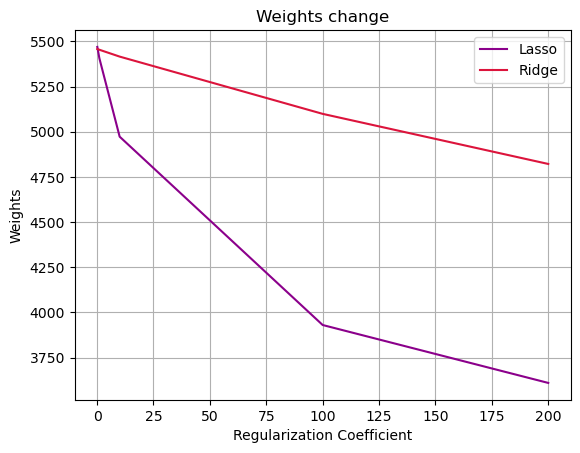

In [29]:
# Лассо-регерссия

mdl1 = Lasso(alpha= 0.1, tol = 0.01)
mdl2 = Lasso(alpha= 1)
mdl3 = Lasso(alpha= 10)
mdl4 = Lasso(alpha= 100)
mdl5 = Lasso(alpha= 200)


mdl1.fit(X1_train, y1_train)
m1 = np.linalg.norm(mdl1.coef_)

mdl2.fit(X1_train, y1_train)
m2 = np.linalg.norm(mdl2.coef_)

mdl3.fit(X1_train, y1_train)
m3 = np.linalg.norm(mdl3.coef_)

mdl4.fit(X1_train, y1_train)
m4 = np.linalg.norm(mdl4.coef_)

mdl5.fit(X1_train, y1_train)
m5 = np.linalg.norm(mdl5.coef_)

# Ridge-регерссия

mdlr1 = Ridge(alpha= 0.1)
mdlr2 = Ridge(alpha= 1)
mdlr3 = Ridge(alpha= 10)
mdlr4 = Ridge(alpha= 100)
mdlr5 = Ridge(alpha= 200)


mdlr1.fit(X1_train, y1_train)
mr1 = np.linalg.norm(mdlr1.coef_)

mdlr2.fit(X1_train, y1_train)
mr2 = np.linalg.norm(mdlr2.coef_)

mdlr3.fit(X1_train, y1_train)
mr3 = np.linalg.norm(mdlr3.coef_)

mdlr4.fit(X1_train, y1_train)
mr4 = np.linalg.norm(mdlr4.coef_)

mdlr5.fit(X1_train, y1_train)
mr5 = np.linalg.norm(mdlr5.coef_)

x = np.array([m1, m2, m3, m4, m5])
z = np.array([mr1, mr2, mr3, mr4, mr5])
y = np.array([0.1, 1, 10, 100, 200])
plt.title("Weights change")
plt.ylabel("Weights")
plt.xlabel("Regularization Coefficient")
plt.plot(y, x, color = 'darkmagenta', label = 'Lasso')
plt.plot(y, z, color = 'crimson', label = 'Ridge')
plt.legend()
plt.grid()
plt.show()

Какой метод агрессивнее уменьшает веса?

Сильнее за большие веса штрафует L2 регуляризатор, который используется в гребневой регрессии. Мы можем наблюдать это в формулах функционала ошибки с регуляризаторами L1 и L2. Гребневая регрессия увеличивает среднеквадратичную ошибку на сумму квадратов всех весов признаков, а лассо-регрессия - на сумму модулей весов, поэтому гребневая регрессия будет давать больший штраф за один и тот же вес. При этом регуляризация L2 не выполняет отбор признаков, поскольку веса уменьшаются только до значений близких к 0, а не нулевых. А лассо-регрессия уменьшает веса до нуля, таем самым исключая признаки из модели. Поэтому можно сказать, что лассо агрессивнее уменьшает веса, что видно на графике.

Почему Lasso используется для отбора признаков?

В основе Lasso-регрессии лежит L1 регуляризатор, штрафующий модель за большие веса. И в отличие от L2 регуляризатора, у него нет производной в нуле, поэтому он зануляет часть весов.

В лассо-регресси в функционал ошибки добавляется слагаемое из коэффициента регуляризации альфа и суммы модулей весов. Если фунционал ошибки является выпуклым, то задача безусловной минимизации функционала ошибки с регуляризатором свобдится к задаче условной оптимизации для некого C. Если изобразить графически линии уровня функционала и множество, ограниченного ||w||1 <= C, то можно увидеть, что решение, которое лежит на ближайшей к безусловному минимуму точке пересечения допустимого множества с линией уровня, будет лежать на одной из вершин ромба.[1] А это соответствует решению с зануленной компонентой.

Таким образом, L1 регуляризация обнуляет часть весов в модели и выбирает только один признак из группы сильно скоррелированных признаков. Если не все признаки являются релевантными, то L1 регуляризация - хороший способ отбора признаков, которые имеют отношение к задаче.

1. Источник: https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/lecture-notes/lecture04-linregr.pdf

In [31]:
from sklearn.linear_model import LassoCV
clf = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5, tol = 0.01)
clf.fit(X1_train, y1_train)
print(clf.alphas_.astype(int))
alph = np.array([200, 100, 10, 1, 0.1])
error = np.mean(clf.mse_path_, axis = 0)

[200 100  10   1   0]


In [32]:
(pd.DataFrame({'MSE': error, 'Alpha': alph})
.sort_values(by = 'MSE', ascending = False)
.set_index('Alpha')).astype(int)

,MSE
Alpha,
100.0,1512775
1.0,1496089
200.0,1467798
10.0,1456236
0.1,1368088


Наименьшую ошибку даёт коэффициент регуляризации 0.1. Однако этот коэффициент регуляризации очень мал. С точки зрения среднеквадратичной ошибки как раз и следует выбрать самый близкий к нулю коэффициент регуляризации. При этом маленькая среднеквадратичная ошибка при подборе параметров по кросс-валидации - недостаточное основание, чтобы подобрать оптимальный гиперпараметр. Ведь по сути отложенная выборка тоже становится обучающей и показатель качества на отложенной выборке уже не характеризует обобщающую способность модели - то есть не говорит нам о её переобучении.

Но при этом выбор слишком большого коэффициента регуляризации сделает модель слошком близкой к константой и она будет плохо описывать любые данные. Выберем коэффициент регуляризации 10, поскольку он даёт сравнительно маленькую среднеквадратичную ошибку по кросс-валидации, но при этом он не слишком мал, чтобы модель переобучилась и не слишком велик, чтобы модели было выгодно стать константной.

In [33]:
clfL = Lasso(alpha = 10)
mod = clfL.fit(X1_train, y1_train)
coefs = mod.coef_.astype(int)
coefs

array([4837,  -41,  -54, -459,    0, -246, -130,  -39,   40,    0,    0,
        137,   85,   59,    0, -173, -278, -394, -473,  183, -259, -579,
         99,    0,  180,  189])

In [34]:
(pd.DataFrame({'coefficient': coefs, 'category': dataX.columns})
.set_index('category'))

,coefficient
category,
carat,4837
depth,-41
table,-54
x,-459
y,0
z,-246
cut_Fair,-130
cut_Good,-39
cut_Ideal,40


Посмотрим, какие признаки обнулила лассо-регрессия. Это признак у - ширина бриллианта, color G - средний по качеству цвет (самый лучший D, а худший - J), чистота VS2 (также средняя по качетву - четвертая из восьми) и премиум и очень хорошая огранка (тоже средние по качеству). Некоторые категориальные признаки были обнулены Лассо-регрессией, потому что они не оказывали значительного влияния на зависимую переменную. Действительно, все обнуленные категориальные признаки отвечают за "среднее" значение объекта по этой категории - не худшая, но и не лучшая огранка / цвет / чистота. Интуитивно такие средние признаки не оказывают большого влияния на цену камня. Что касается вещественных признаков и обнуления ширины, посмотрим еще раз на корреляционную матрицу.

In [35]:
corr_matrix = data1.corr()
df = pd.DataFrame(data = corr_matrix)
df

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Мы видим, что длина и ширина бриллианта очень сильно скоррелированы - 0.974701. Особенность L1 регуляризации состоит в том, что она из сильно скоррелированных признаков выбирает произвольно только один признак.[2] В нашем случае со скоррелированными x и y модель произвольно обнулила y.

Таким образом, обнулённые признаки неинформативны для нашей модели. Кроме того, поскольку мы провели стандартизацию, мы можем оценивать информативность признака по присвоенному ему весу, ведь все признаки измеряются в одной шкале. Самый большой по модулю вес получили караты, его вес на порядок (а иногда на два) превышает все остальные. Также мы видим достаточно большой по модулю вес у ширины бриллианта. Вещественные признаки depth и table можно назвать малоинформативными. Среди категориальных признаков отметим, что худший из признаков получал самый большой отрицательный вес, а лучший самый большой положительный. Действительно, такие крайние значения сильнее влияют на цену, чем промежуточные. Например, худшая огранка имеет вес -130, а лучшая 40 - это самый маленький и самый большой веса среди огранок соответственно. При этом, можно отметить, что почти по всем категориальным признакам, вес худшего значения по модулю больше, чем вес лучшего.

2. Источник: https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization

In [36]:
yL_pred = clfL.predict(X1_test)
print("Test MSE = %.4f" % mean_squared_error(y1_test, yL_pred))

Test MSE = 1330110.2928


Значение среднекадратичной ошибки в обычной линейной регрессии на тестовой выборке было равно 45394143620049797915307147264. Среднеквадратичная ошибка на тесте упала на целых 22 порядка в лассо-регрессии. Безусловно, лассо-регрессию лучше использовать для предсказаний.

В изначальной модели наблюдалась сильная мультиколлинеарность из-за того, что многие признаки в нашем датасете сильно скоррелированны между собой. Это очень плохо для линейной модели. Во-первых, при сильной мультиколлинеарности определитель матрицы очень близок к нулю, а поскольку при поиске коэффициентов модели мы используем значение обратное определителю, веса становятся огромными, что само по себе противоестественно. Во-вторых, из-за плохой обусловленности такой матрицы малейшие ошибки округления, которые неизбежно делает компьютер при типе данных float приводят к значительным изменениям оценок коэффициентов. Наблюдается огромная вариация оценок при малейших изменениях в данных, а это значит, что наши результаты очень неустойчивы. В-третьих, все эти идеи можно суммировать в том факте, что наша модель переобучена. Следовательно, она будет показывать плохой результат на новых данных при неплохой ошибке на обучающей выборке, что и произошло в нашем примере.

Lasso-регрессия же решает проблему мультиколлинеарности - из сильно скоррелированных признаков она отбирает наиболее информативные, зануляя веса (при умножении нулевого веса на признак обнуляется сам признак). Поскольку в лассо-регрессии так или иначе решилась проблема мультиколлинеарности, исчезли и недостатки нашей изначальной модели. Новая модель хорошо показывает себя на тестовой выборке.